# Results

In this notebook the results will be presented and commented.

All results were acquired with Apnea-ECG dataset from Physionet. This dataset contains 35 acquisitions performed during sleep with ecg. For 8 users, besides the ecg, the respiration was also recorded in 3 locations: chest, nasal and abdominal. For a greater resemblance of ecg and respiration results and for reproductibility to other datasets based on chest respiration measurements, only this location was considered. 

With this dataset we can validate our algorithms for apnea classification and for deriving respiration from the ecg signal.


## 1. AutoEncoder Codification on Respiration Features

In This first technique, the autoencoder was created over the features extracted from the respiration signal. The features were extracted through biosppy, reaching a total of 274 features. These came from statistical, temporal, spectral domains, applied to the signal and some fiducial points, such as zeros, inhale duration, exhale duration, etc.

This AutoEncoder is composed by 3 layers = 150, 80, 30
    - The loss method is cosine proximity
    - Activation function is the hyperbolic tangent
    - Optimizer is adam
    - Number of epochs = 50, batchsize=256

This results presented are for leave one user out cross validation, where each user is the testing set and the remaining 8 users are the training set.
Within the training set, the autoencoder is created with a random separation of training and testing of 60/40.

Table 1 and Table 2 shows us the results using the respiratory features for the encoding and decoding vectors, respectively. The encoding vector leads to a better accuracy of ~ 85+/-10 %



In [1]:
import pandas as pd

table1 = pd.read_csv(r'f1score_respAEencoding.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
table2 = pd.read_csv(r'f1score_respAEdecoding.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
table3 = pd.read_csv(r'f1score_resp30AEencoding.csv', header=[0]) #Don't forget to add '.csv' at the end of the path

In [2]:
table1 = pd.read_csv(r'score_RF_bitalino.csv', header=[0]) #Don't forget to add '.csv' at the end of the path

In [3]:
# import seaborn as sb
# sb.set(font_scale=3)
# plt.figure(figsize=(30,5))
# plt.scatter(np.arange(len(table1)),table1)

table2 = pd.read_csv(r'score_SVM_NB_bitalino.csv', header=[0])

table3 = pd.read_csv(r'score_NB_bitalino.csv', header=[0])
print('RF')
print(table1.mean(),table1.std())
print('SVM_NN')
print(table2.mean(),table2.std())
print('SVM')
print(table3.mean(),table3.std())


RF
0    82.599333
dtype: float64 0    7.814143
dtype: float64
SVM_NN
0    84.667
dtype: float64 0    7.998065
dtype: float64
SVM
0    85.0
dtype: float64 0    7.485609
dtype: float64


In [4]:
for i in [200,75,50,20]:
    table1 = pd.read_csv(r'score_'+str(i)+'_SVM_ApECG.csv', header=[0])
    print(table1.mean(),table1.std())

FileNotFoundError: [Errno 2] File b'score_200_SVM_ApECG.csv' does not exist: b'score_200_SVM_ApECG.csv'

## 2. AutoEncoder Codification on ECG Features

In this technique, the autoencoder was created over the features extracted from the respiration signal. The features were extracted through biosppy, reaching a total of 138 features. These came from statistical, temporal, spectral domains, applied to the signal and some fiducial points, such as zeros, inhale duration, exhale duration, etc.

This AutoEncoder is composed by 3 layers = 150, 80, 30
    - The loss method is cosine proximity
    - Activation function is the hyperbolic tangent
    - Optimizer is adam
    - Number of epochs = 50, batchsize=256

This results presented are for leave one user out cross validation, where each user is the testing set and the remaining 8 users are the training set.
Within the training set, the autoencoder is created with a random separation of training and testing of 60/40.

Table 1 and Table 2 shows us the results using the respiratory features for the encoding and decoding vectors, respectively. The encoding vector leads to a better accuracy of ~ 85+/-10 %



In [5]:
table4 = pd.read_csv(r'f1score_ecgAEencoding.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
table5 = pd.read_csv(r'f1score_edrAEencoding.csv', header=[0]) #Don't forget to add '.csv' at the end of the path

In [6]:
table4

,KNN,SVM,Decision Tree,Random Forest,Neural Net,Adaboost,GradBoost,Naive Bayes,QDA
0,38.52,3.28,3.07,3.07,3.69,3.07,3.07,96.31,3.69
1,20.30,20.30,20.30,20.30,20.30,20.30,20.30,20.49,20.30
2,59.46,50.39,60.42,60.42,52.51,60.42,60.42,48.46,48.46
3,26.27,2.65,3.05,3.05,7.74,3.05,3.05,92.87,8.76
4,63.37,61.52,76.54,61.73,70.58,63.79,63.99,4.53,83.33
5,20.70,12.01,21.95,21.95,100.00,21.95,21.95,2.28,98.76
6,15.97,15.97,16.37,16.57,97.80,19.96,16.57,2.79,32.53
7,27.15,5.96,29.14,47.46,100.00,29.14,29.14,13.25,57.17


In [7]:
tab1 = pd.read_csv(r'score_SVM_apneaecg.csv', header=[0]) 
tab2 = pd.read_csv(r'score_Random Forest_apneaecg.csv', header=[0]) 
tab3 = pd.read_csv(r'score_Naive Bayes_apneaecg.csv', header=[0]) 

for i in range(len(tab1)):

    mp = np.mean([tab1.loc[i],tab2.loc[i],tab3.loc[i]])
    st = np.std([tab1.loc[i],tab2.loc[i],tab3.loc[i]])


    print(mp,st)

NameError: name 'np' is not defined

In [8]:
import matplotlib.pyplot as plt
import numpy as np

tab1 = pd.read_csv(r'score_SVM_bitalino.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
clas = ['SVM_RF']
names = ["KNN", "SVM","Decision Tree", "Random Forest", "Neural Net",\
            "GradBoost", "Naive Bayes", "QDA"]
size = [100]

for cl in size:
    print(int(1000/cl))
    
    tab = pd.read_csv(r'score_' + str(cl) + '_NB_apneaecg.csv', header=[0])
    mean_t = tab.mean()
    std_t = tab.std()
    print(mean_t, std_t)

10
0    94.4475
dtype: float64 0    3.758365
dtype: float64


In [9]:
names = ["KNN", "SVM", "Decision Tree", "Random Forest", "Neural Net",        "Adaboost", "GradBoost", "Naive Bayes", "QDA"]

knn_rgbt = pd.read_csv(r'score_KNN_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path

print(knn_rgbt.mean(), knn_rgbt.std())

4     78.844333
10    84.044667
13    83.211333
20    83.655667
50    82.400333
dtype: float64 4     7.667136
10    6.546018
13    8.046751
20    5.807575
50    6.421089
dtype: float64


KNN
SVM


ValueError: x and y must be the same size

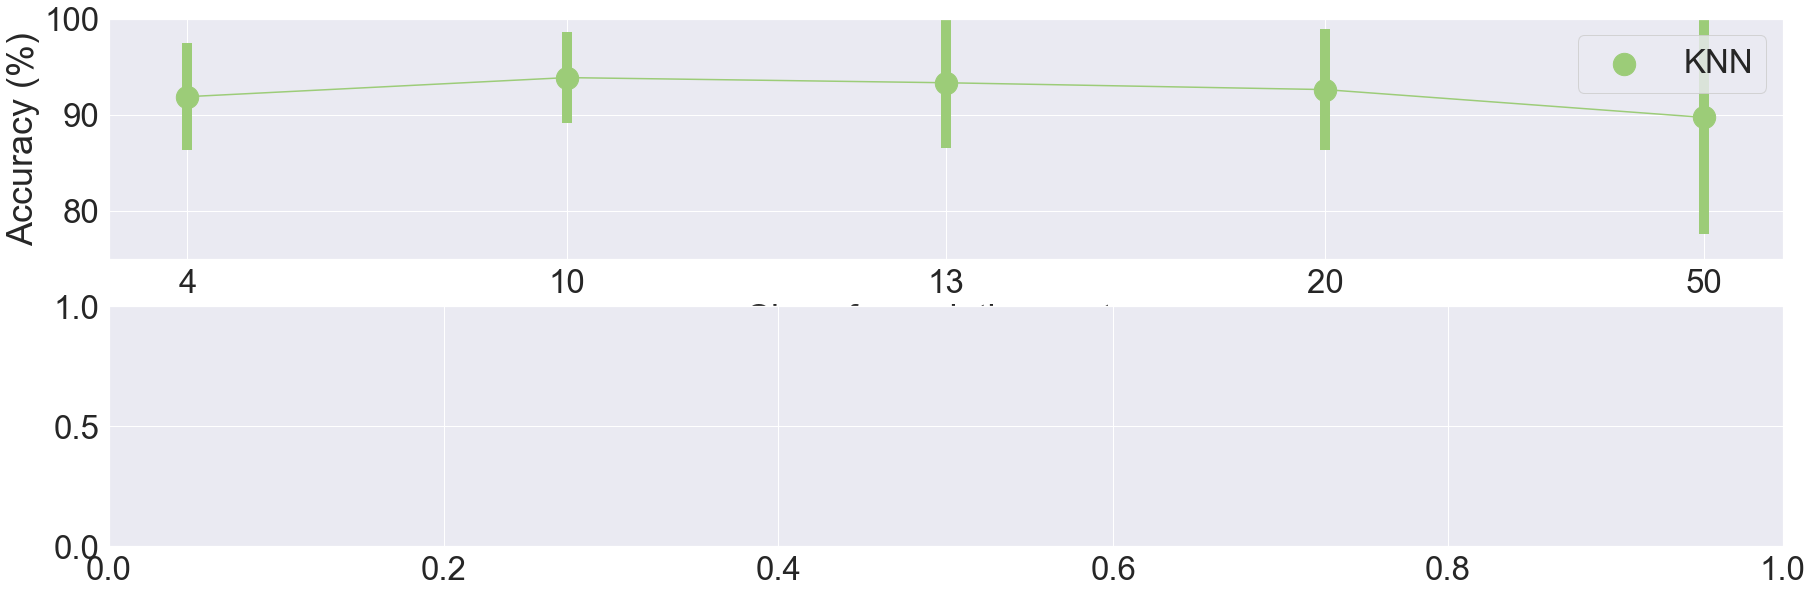

In [10]:
import seaborn as sb
sb.set(font_scale=3)
clr = ['#0066cc', '#66ccff','#339933']
gen_clr = ['#9CCC78','#FFAC63','#439A86','#007991','#222E50']
plt.figure(figsize=(30,15))
names = ["KNN", "SVM","Decision Tree", "KNN", "SVM","Decision Tree"]
for i, n in enumerate(names[:3]):
    print(n)

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    vals = pd.read_csv(r'score_'+n+'_ApECG.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
    plt.subplot(3,1,i+1)


    plt.scatter([0,1,2,3,4],vals.mean(),s=500, color=gen_clr[i], label = n)

    plt.errorbar([0,1,2,3,4], vals.mean(),vals.std(), mfc='red',
             mec='green', ms=20, mew=4, elinewidth =10, color=gen_clr[i])
    plt.xticks([0,1,2,3,4],[4,10,13,20,50])
    plt.ylim(75,100)
    plt.legend()
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Size of correlation vector')
plt.show()
plt.savefig('corr_acc',bbox_inches='tight')


In [22]:
pd.read_csv(r'score_f1_4_autocorr_'+n+'_rgbt.csv', header=[0]).values[0]

FileNotFoundError: [Errno 2] File b'score_f1_4_autocorr_4_rgbt.csv' does not exist: b'score_f1_4_autocorr_4_rgbt.csv'

KNN
SVM


ValueError: shape mismatch: objects cannot be broadcast to a single shape

<Figure size 3600x1440 with 0 Axes>

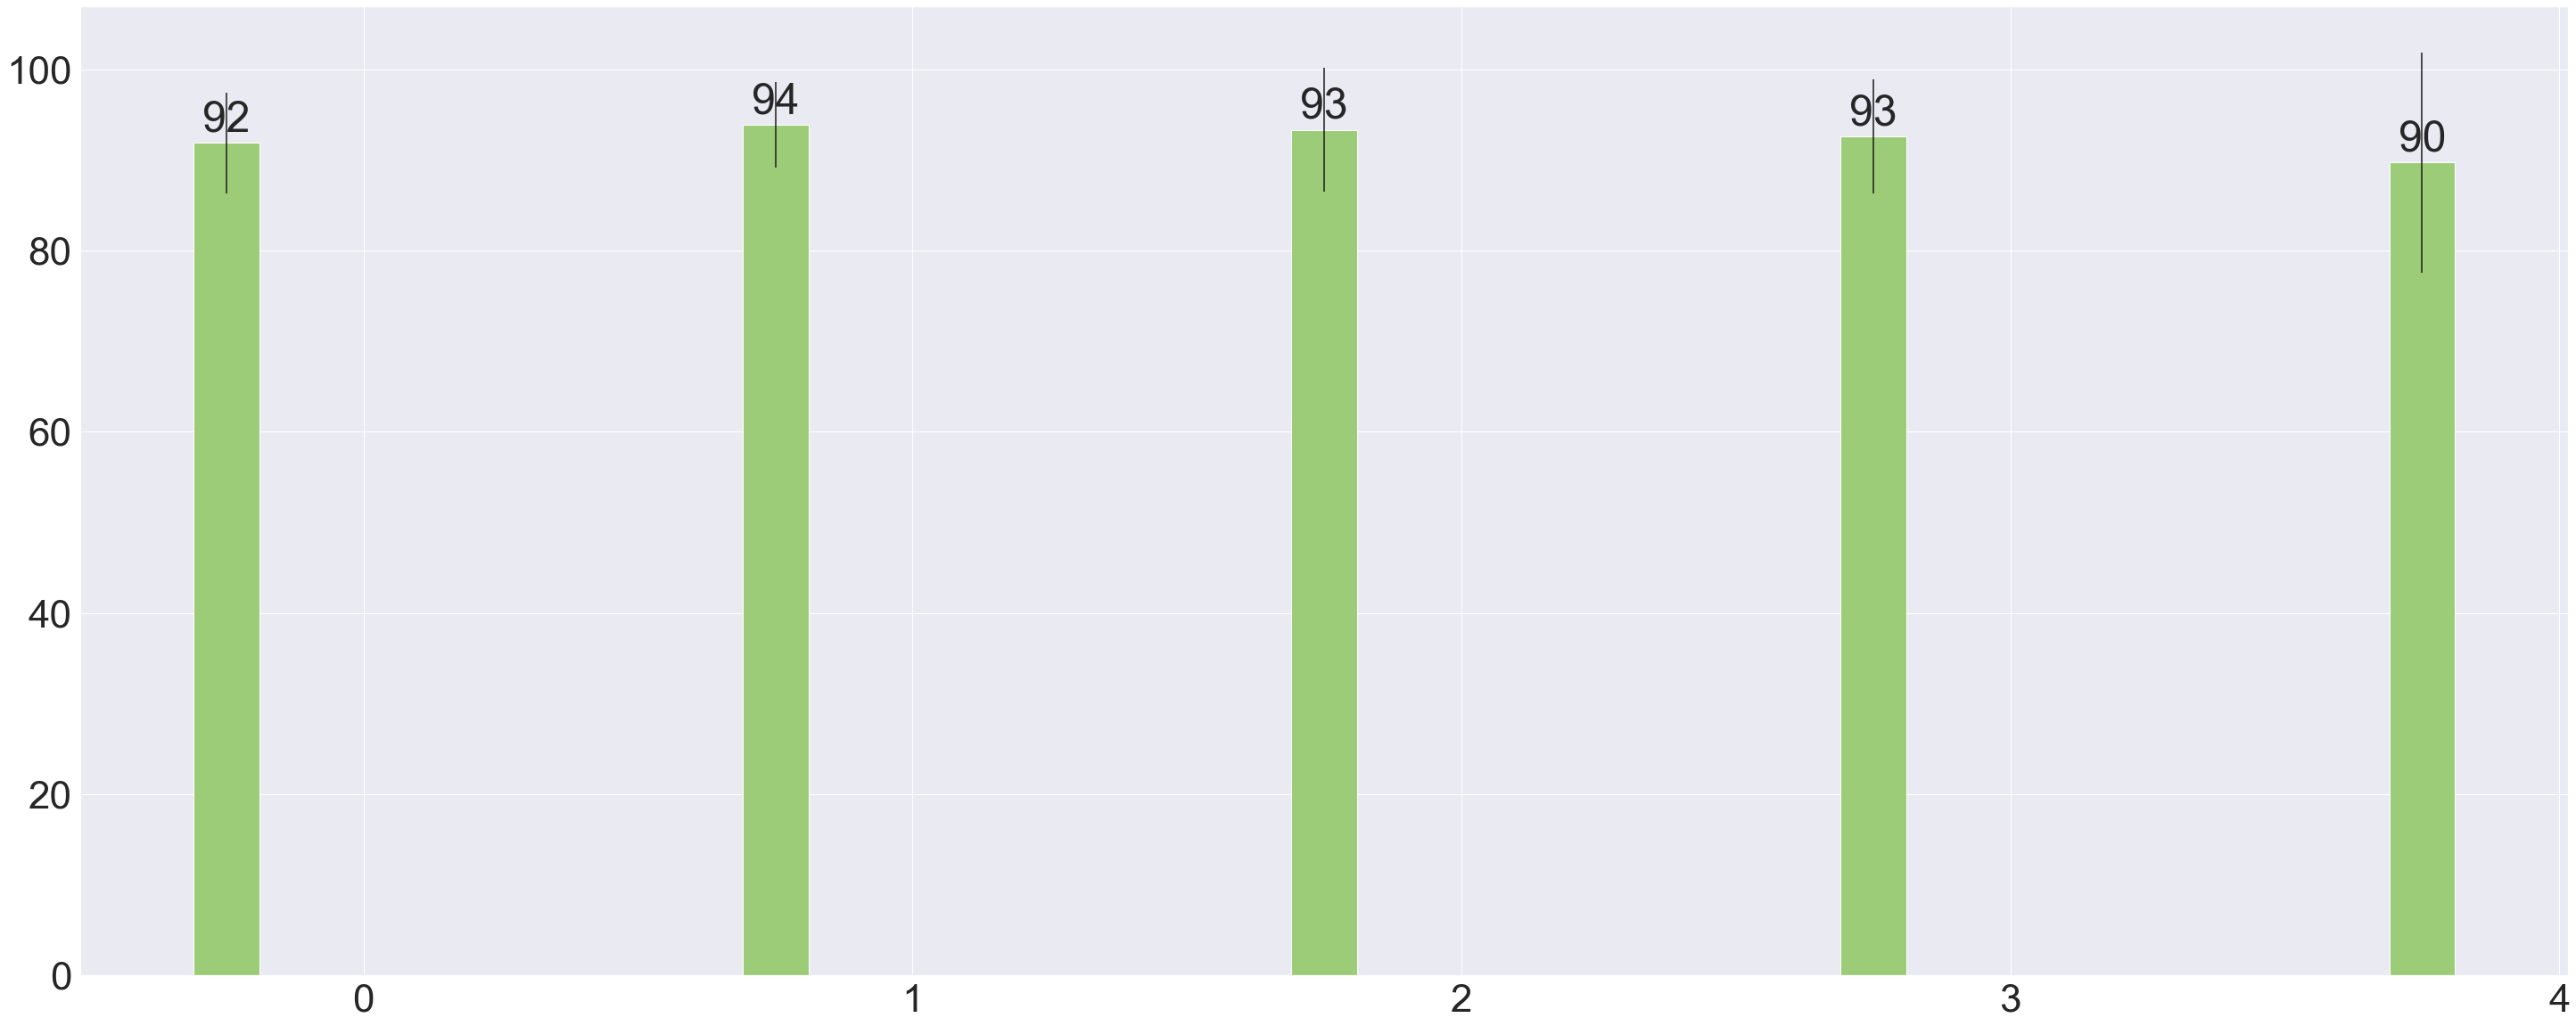

In [12]:
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(np.round(rect.get_height()))),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = ['4', '10', '13', '20', '50']
sb.set(font_scale=4)
gen_clr = ['#9CCC78','#FFAC63','#C05746','#439A86','#007991','#9CAFB7']

names = ["KNN", "SVM","Decision Tree", "Random Forest", "MLP","NB"]
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
fig = plt.figure(figsize=(50,20))
widths = [-0.25,-0.15,-0.05,0.05,0.15,0.25]
fig, ax = plt.subplots(figsize=(50,20))
n_vals = []
tab_names = pd.DataFrame()
tab_names_dev = pd.DataFrame()

for i, n in enumerate(names):
    print(n)

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    vals = pd.read_csv(r'score_'+n+'_ApECG.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
    curr_x = x + widths[i]
    rects1 = ax.bar(curr_x, vals.mean(), width/5, yerr = vals.std(), label=n, color=gen_clr[i])
    autolabel(rects1)
    n_vals += [vals.mean()]
    tab_names_dev[n]=vals.std()
    tab_names[n]=vals.mean()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Results for Apnea-ECG with all classifiers with different sizes of correlation vector')
ax.set_xticks(x)
ax.set_ylim(80,101)
ax.set_xticklabels(labels)
ax.legend(loc=3)


#fig.tight_layout()

plt.show()

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['4', '10', '13', '20', '50']
sb.set(font_scale=5)
names = ["SVM","MLP","NB"]
x = np.arange(len(labels))  # the label locations
width = 1 # the width of the bars
fig = plt.figure(figsize=(60,20))
widths = [-0.5,-0.3,-0.1,0.1,0.3,0.5]
fig, ax = plt.subplots(figsize=(50,20))
rgbt_names = pd.DataFrame()
rgbt_names_dev = pd.DataFrame()
for i, n in enumerate(names):
    print(n)

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    vals = pd.read_csv(r'score_f1_autocorr_'+n+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
    curr_x = x + widths[i]
    rects1 = ax.bar(curr_x, vals.mean(), width/6, yerr = vals.std(), label=n, color=gen_clr[i])
    rgbt_names_dev[n]=vals.std()
    rgbt_names[n]=vals.mean()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Results for Apnea-ECG with all classifiers with different sizes of correlation vector')
ax.set_xticks(x)
ax.set_ylim(75,95)
ax.set_xticklabels(labels)
ax.legend(loc=3)


#fig.tight_layout()

plt.show()


In [ ]:
rgbt_names


[-0.25  0.75  1.75  2.75  3.75  4.75]


ValueError: The lengths of the data (6) and the error 1 do not match

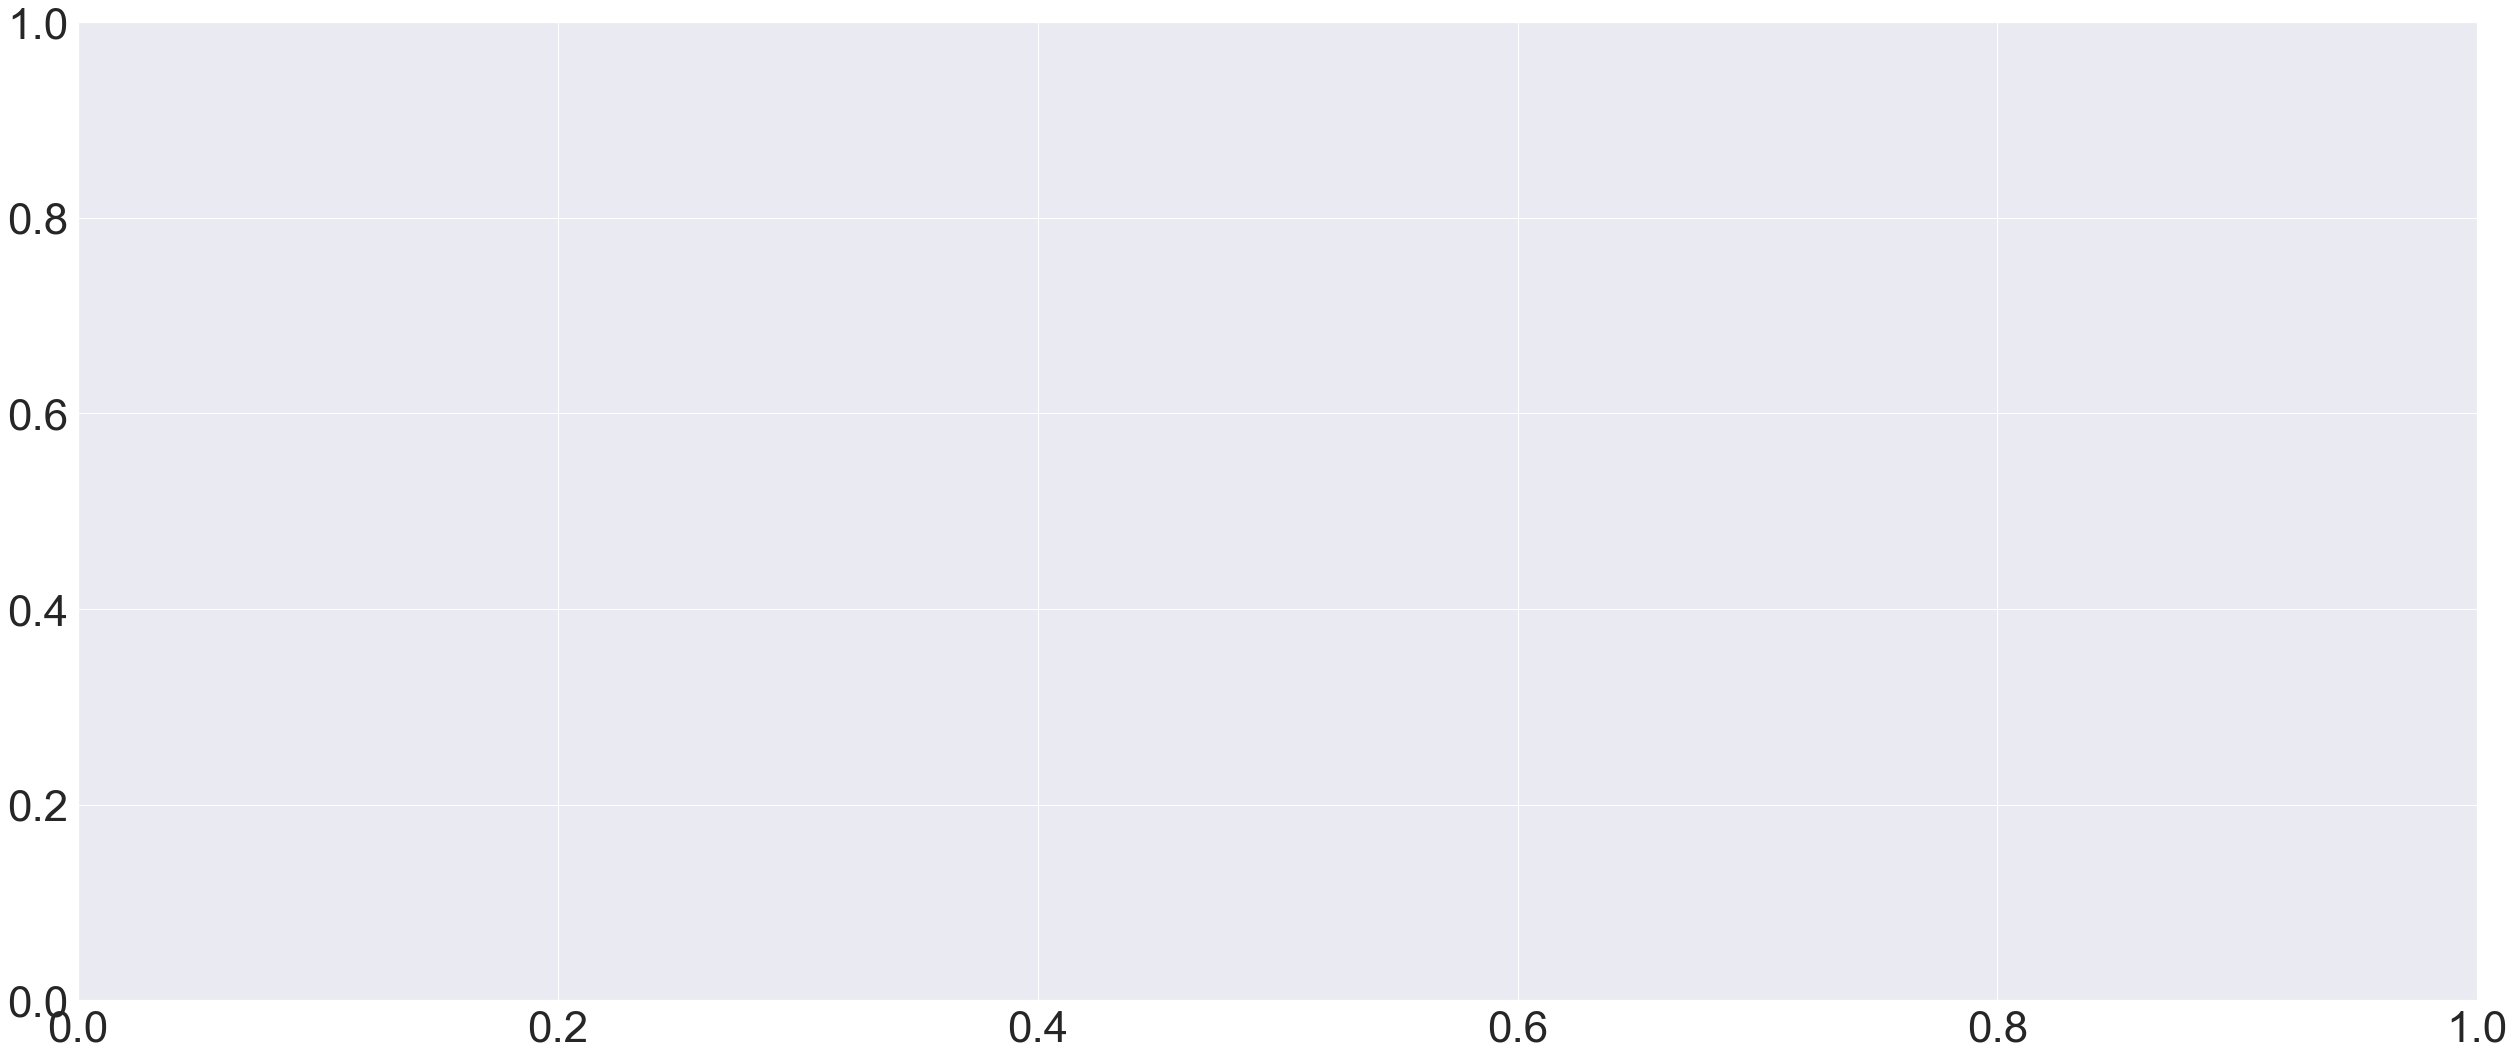

In [13]:
names = ['4', '10', '13', '20', '50']
sb.set(font_scale=4)
gen_clr = ['#9CCC78','#FFAC63','#C05746','#439A86','#007991','#9CAFB7']

labels = ["KNN", "SVM","Decision Tree", "Random Forest", "MLP","NB"]
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
widths = [-0.25,-0.15,-0.05,0.05,0.15,0.25]
fig, ax = plt.subplots(figsize=(43,18))
n_vals = []
for i, n in enumerate(names):
    if n == 'Decision Tree':
        n = 'DT'
    if n == 'Random Forest':
        n = 'RF'

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    val = tab_names.iloc[i]
    std_dev = tab_names_dev.iloc[i]
    curr_x = x + widths[i]
    print(curr_x)
    rects1 = ax.bar(curr_x, 2, width/5, val.values, yerr=std_dev,label=n, color=gen_clr[i])
    #autolabel(rects1)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)')
ax.set_title('Apnea-ECG results for all classifiers with different sizes of correlation vector')
ax.set_xticks(x)
ax.set_ylim(80,101)
ax.set_xticklabels(labels)
ax.legend(loc=3)


fig.savefig('Results_2020_ApECG.eps', bbox_inches='tight',  format='eps')

4


ValueError: The lengths of the data (6) and the error 1 do not match

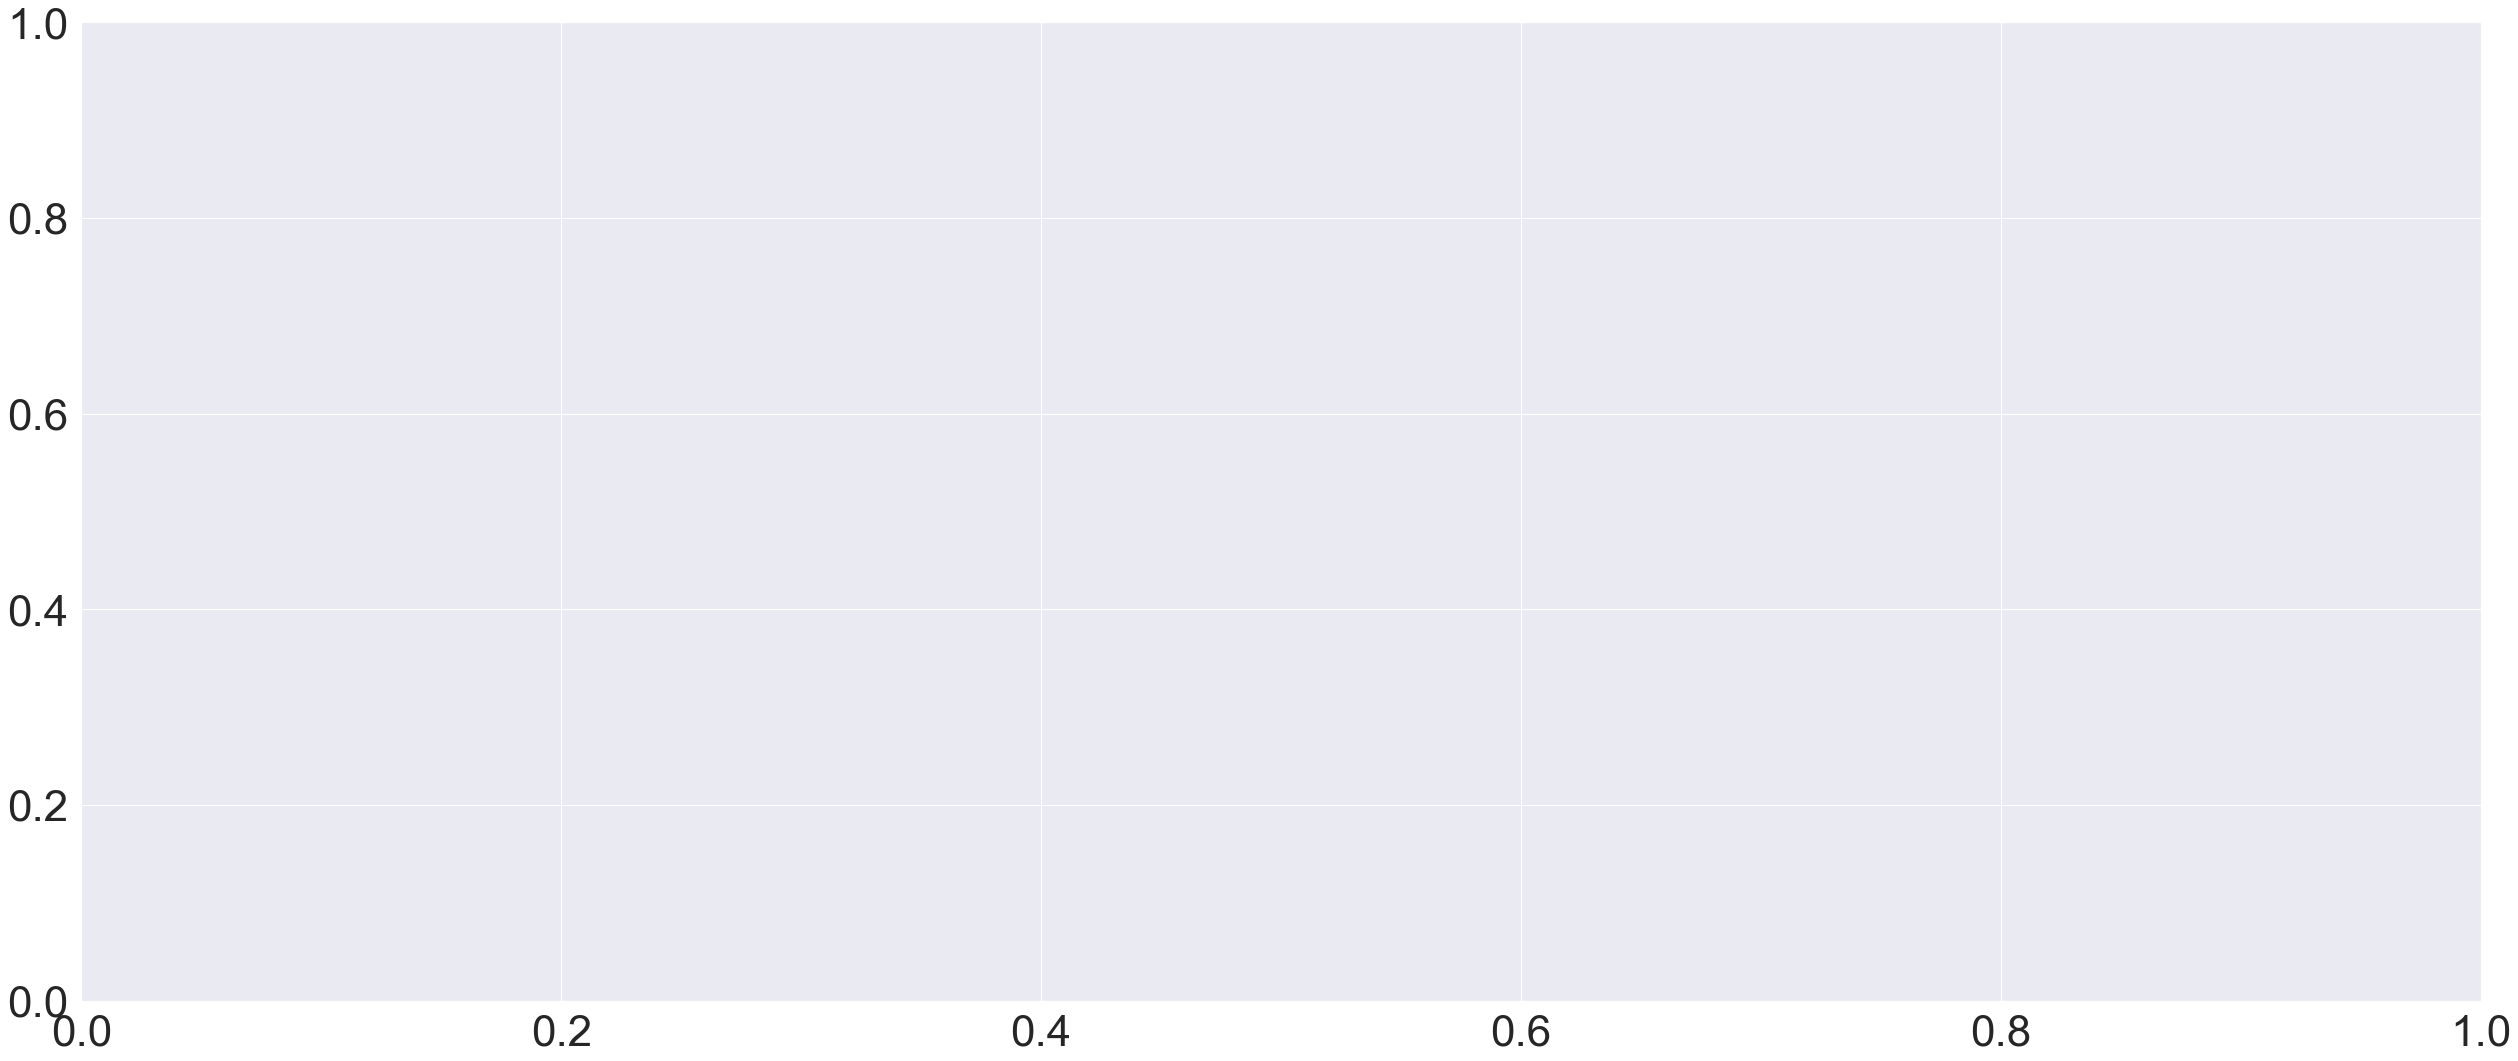

In [21]:
def plot_apECG():
    names = ['4', '10', '13', '20', '50']
    sb.set(font_scale=4)
    gen_clr = ['#9CCC78','#FFAC63','#C05746','#439A86','#007991','#9CAFB7']

    labels = ["KNN", "SVM","Decision Tree", "Random Forest", "MLP","NB"]
    x = np.arange(len(labels))  # the label locations
    width = 0.6  # the width of the bars
    widths = [-0.25,-0.15,-0.05,0.05,0.15,0.25]
    fig, ax = plt.subplots(figsize=(43,18))
    n_vals = []
    for i, n in enumerate(names):
        print(n)
        if n == 'Decision Tree':
            n = 'DT'
        if n == 'Random Forest':
            n = 'RF'

        #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
        val = tab_names.iloc[i]
        std_dev = tab_names_dev.iloc[i]
        curr_x = x + widths[i]
        rects1 = ax.bar(curr_x, 1, width/5, val.values, yerr=std_dev,label=n, color=gen_clr[i])
        #autolabel(rects1)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (%)')
    ax.set_title('Apnea-ECG results for all classifiers with different sizes of correlation vector')
    ax.set_xticks(x)
    ax.set_ylim(80,101)
    ax.set_xticklabels(labels)
    ax.legend(loc=3)
    plt.show()

    fig.savefig('Results_2020_ApECG.eps', bbox_inches='tight',  format='eps')

def plot_rgbt():
    names = ['4', '10', '13', '20', '50']
    sb.set(font_scale=4)
    gen_clr = ['#9CCC78','#FFAC63','#C05746','#439A86','#007991','#9CAFB7']

    labels = ["SVM","MLP","NB"]
    x = np.arange(len(labels))  # the label locations
    width = 0.6  # the width of the bars
    widths = [-0.25,-0.15,-0.05,0.05,0.15,0.25]
    fig, ax = plt.subplots(figsize=(30,15))
    n_vals = []
    for i, n in enumerate(names):

        #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
        val = rgbt_names.iloc[i]
        std_dev = rgbt_names_dev.iloc[i]
        curr_x = x + widths[i]
        rects1 = ax.bar(curr_x, 2, width/5, val.values, yerr=std_dev,label=n, color=gen_clr[i])
        #autolabel(rects1)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (%)')
    ax.set_title('RGBT dataset results for ')
    ax.set_xticks(x)
    #ax.set_ylim(66,96)
    ax.set_xticklabels(labels)
    ax.legend(bbox_to_anchor=(1.1, 0.95))


    fig.savefig('Results_2020_f1_RGBT.eps', bbox_inches='tight',  format='eps')

plot_apECG()
#plot_rgbt()

NameError: name 'rgbt_names' is not defined

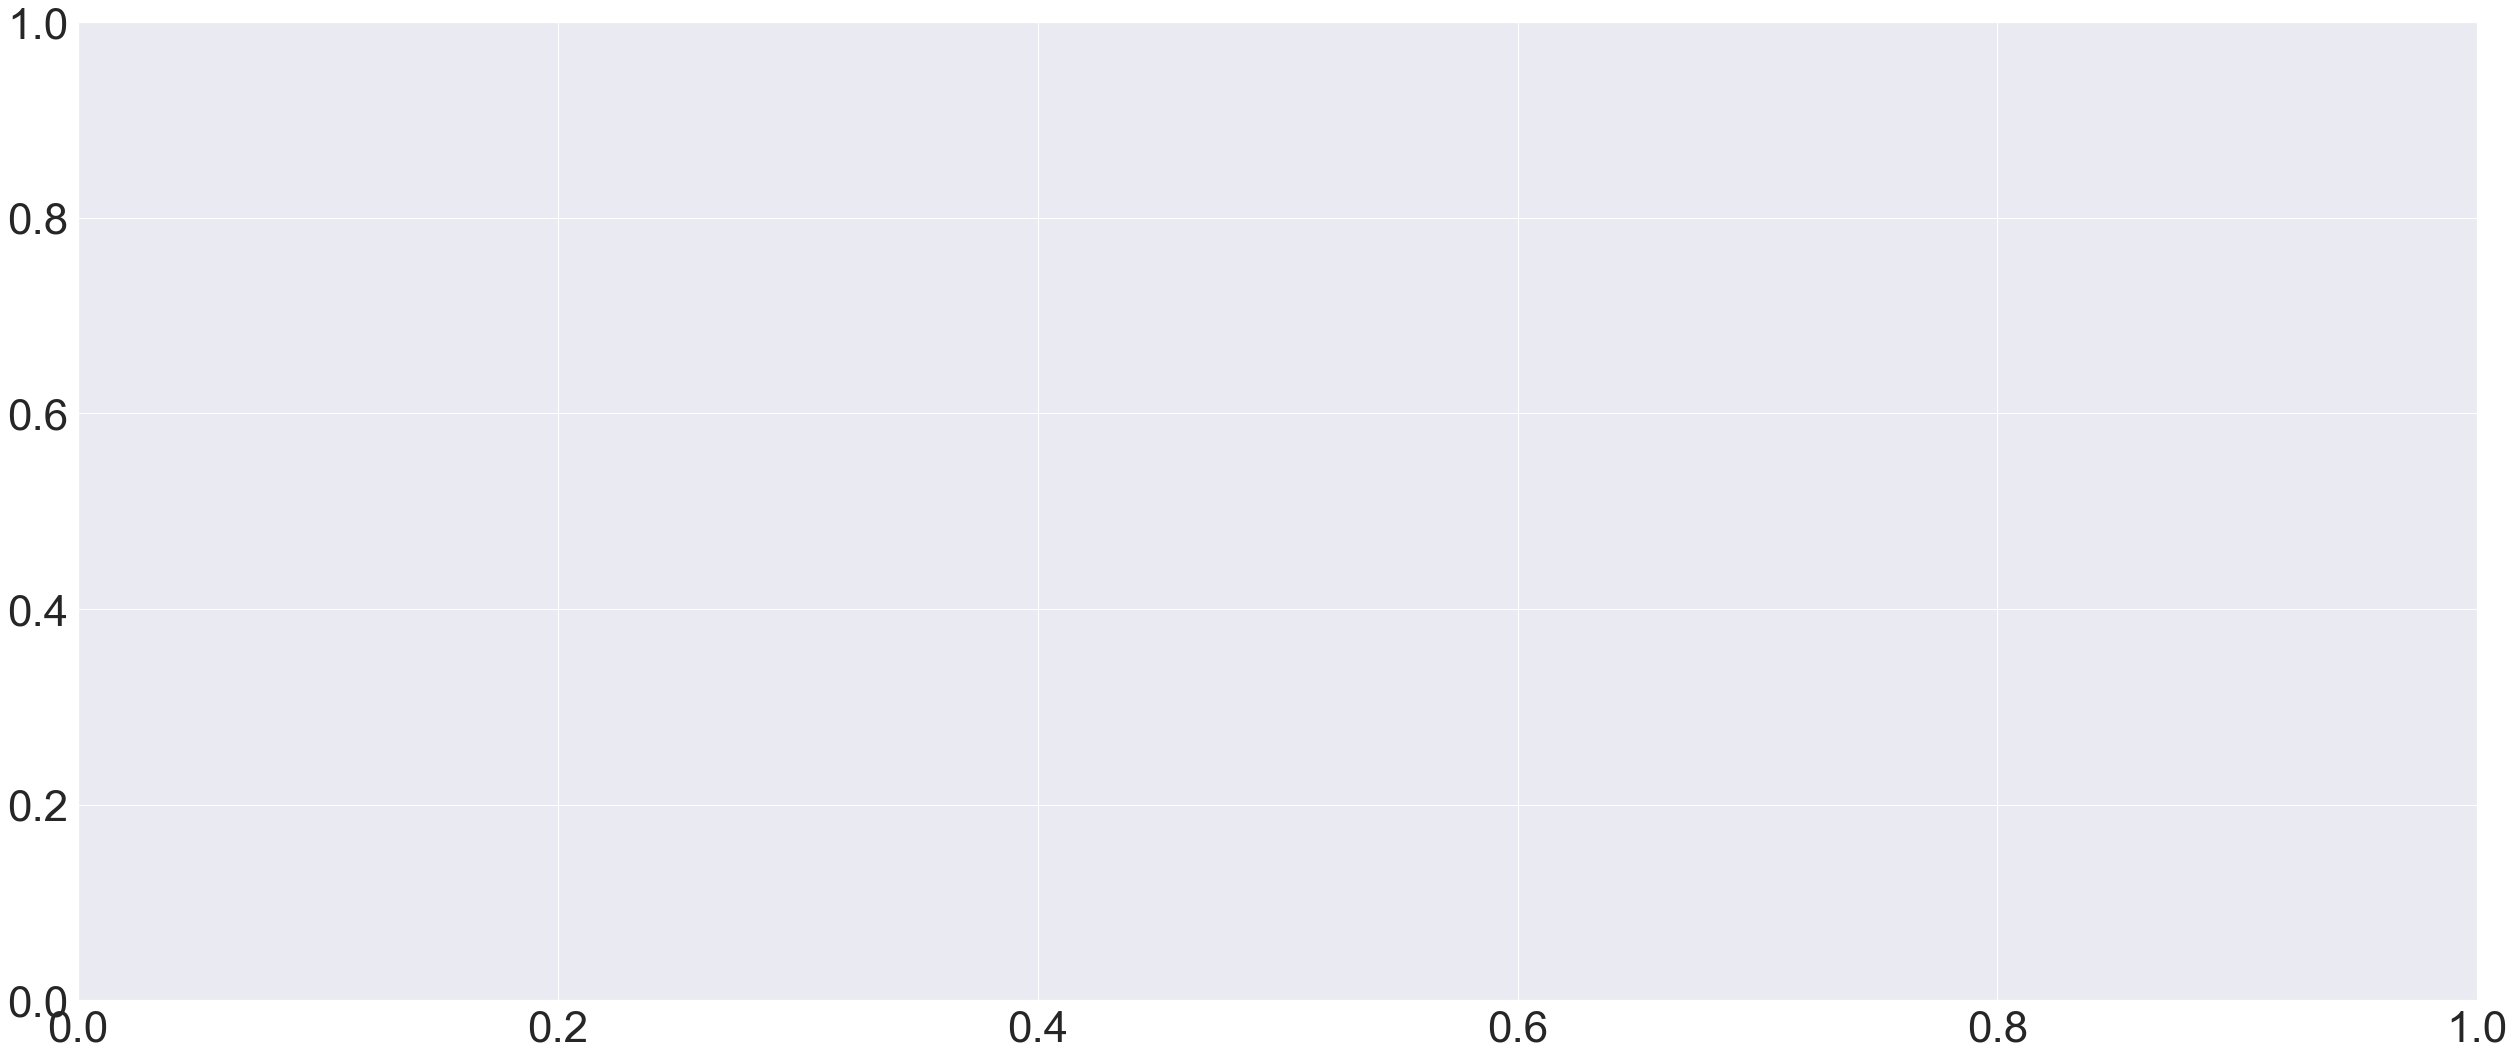

In [14]:

def plot_rgbt():
    sb.set(font_scale=4)
    gen_clr = ['#9CCC78','#FFAC63','#C05746','#439A86','#007991','#9CAFB7']

    labels = ["KNN","SVM","Decision Tree", "MLP","NB"]
    x = np.arange(len(labels))  # the label locations
    width = 0.6  # the width of the bars
    widths = [-0.25,-0.15,-0.05,0.05,0.15,0.25]
    fig, ax = plt.subplots(figsize=(43,18))
    n_vals = []
    for i, n in enumerate(names):

        #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
        val = rgbt_names.iloc[i]
        std_dev = rgbt_names_dev.iloc[i]
        curr_x = x + widths[i]
        rects1 = ax.bar(curr_x, 1, width/5, val.values, yerr=std_dev,label=n, color=gen_clr[i])
        #autolabel(rects1)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (%)')
    ax.set_title('RGBT dataset results for all classifiers with different sizes of correlation vector')
    ax.set_xticks(x)
    ax.set_ylim(66,96)
    ax.set_xticklabels(labels)
    ax.legend(loc=3)


    fig.savefig('Results_sinus_RGBT.eps', bbox_inches='tight',  format='eps')
plot_rgbt()

In [ ]:
names = ['notfree_10_MLP','free_10_MLP','freeall_10_MLP']

true = pd.DataFrame([['N','N','N','N','N','N','N','N','N','N','A','A','A','A','A']]*135,columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
from sklearn.metrics import accuracy_score

all_cls = []
for na in names:
    
    tab1 = pd.read_csv(r'pred_'+na+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
    scores = pd.DataFrame()
    for col in tab1.columns:
        all_scores = []
        for rows in range(0,len(tab1),5):
            score = accuracy_score(true[int(col)][rows:rows+5], tab1[col][rows:rows+5])
            all_scores += [score*100]
        scores[col] = all_scores
    mean_sc = scores.mean()
    std_sc = scores.std()
    all_cls += [[mean_sc,std_sc]]


In [15]:
plt.figure(figsize=(30,10))
names=['SVM']
for na in names:
    #vals = pd.read_csv(r'score_multiclass_f_'+na+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
    vals = pd.read_csv(r'score_autocorr_'+na+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
    print(vals.mean())
    print(vals.std())
    print(vals)


SVM_4    80.888519
dtype: float64
SVM_4    7.957666
dtype: float64
    SVM_4
0   73.33
1   74.67
2   78.67
3   94.67
4   84.00
5   69.33
6   81.33
7   90.67
8   80.00
9   82.67
10  94.67
11  76.00
12  65.33
13  93.33
14  89.33
15  76.00
16  76.00
17  84.00
18  78.67
19  81.33
20  81.33
21  80.00
22  76.00
23  93.33
24  84.00
25  77.33
26  68.00


<Figure size 2160x720 with 0 Axes>

In [16]:
bitalino = "C:\\Users\\Mariana\\Documents\\Databases\\APNEIA\\"
import os

def normal(sg, minsg, maxsg):
    res = 100 * (sg - minsg) / (maxsg - minsg)
    return res
import biosppy as bp
# all_files = [folder+ol for ol in os.listdir(folder)]
bitalino_files = [bitalino + ol for ol in os.listdir(bitalino)]
marker_label = dict([(2, 'N'), (5, 'N'), (8, 'A'), (10, 'A'), (12, 'A'), (14, 'A'), (16, 'A')])
_label = dict([(0, 'N'), (1, 'N'), (2, 'A'), (3, 'A'), (4, 'A'), (5, 'A'), (6, 'A')])
import seaborn as sb
sb.set(font_scale=3)
user_labs = []
user_data = []
for bf in [40]:#range(len(bitalino_files)):
    labs = []
    data = []
    df = pd.DataFrame.from_csv(bitalino_files[bf], parse_dates=True, index_col=0, header=0,sep=';')

    resp = np.array(bp.tools.filter_signal(df.A1, ftype='butter', band='bandpass', order=2, frequency=[0.01,0.35],sampling_rate=1000.)[
                        'signal'])
    resp = normal(resp,np.min(resp),np.max(resp))
    
    list_markers = [[mk, marker] for mk, marker in enumerate(df.MARKER) if
                        marker != 0 and marker in marker_label.keys()]
    print(list_markers)
    fig=plt.figure(figsize=(50,15))
    print(list_markers)
    plt.plot(np.arange(0,len(resp)/1000,0.001),resp, color ='#a0bab9',linewidth=3)
    plt.vlines(np.array(list_markers[1:])*0.001,0,100,linewidth=3)
    plt.title('BrainAnswer RGBT exercise sequence')
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude (%)')
    arr = np.array(list_markers)[:,0]*0.001
    la = 0
    ka = 0
    plt.plot()
    for o, lm in enumerate(arr[::2]):
        if _label[la] == 'N':
            for i in range(5):
                #print(i*30+lm)
                plt.scatter(i*60+30+lm, all_cls[0][0][ka], color=gen_clr[1],s=500)
                plt.scatter(i*60+30+lm, all_cls[1][0][ka], color=gen_clr[2],s=500)
                plt.scatter(i*60+30+lm, all_cls[2][0][ka], color=gen_clr[3],s=500)

                ka += 1
        if _label[la] == 'A':
            plt.scatter(30+lm, all_cls[0][0][ka], color=gen_clr[1],s=500)
            plt.scatter(30+lm, all_cls[1][0][ka], color=gen_clr[2],s=500)
            plt.scatter(30+lm, all_cls[2][0][ka], color=gen_clr[3],s=500)
            ka += 1
        plt.text(lm+20,90,_label[la])
        la+=1
    plt.ylim(50,100)
    plt.show()
            

       

Using TensorFlow backend.


FileNotFoundError: [WinError 3] O sistema não conseguiu localizar o caminho especificado: 'C:\\Users\\Mariana\\Documents\\Databases\\APNEIA\\'

In [ ]:
bitalino = "C:\\Users\\Mariana\\Documents\\Databases\\APNEIA\\"
import os

def normal(sg, minsg = 0, maxsg = 0):
    if minsg == 0:
        minsg = np.min(sg)
        maxsg = np.max(sg)
    res = 100 * (sg - minsg) / (maxsg - minsg)
    return res
import biosppy as bp
# all_files = [folder+ol for ol in os.listdir(folder)]
bitalino_files = [bitalino + ol for ol in os.listdir(bitalino)]
marker_label = dict([(2, 'N'), (5, 'N'), (8, 'A'), (10, 'A'), (12, 'A'), (14, 'A'), (16, 'A')])
_label = dict([(0, 'N'), (1, 'N'), (2, 'A'), (3, 'A'), (4, 'A'), (5, 'A'), (6, 'A')])
import seaborn as sb
sb.set(font_scale=15)
user_labs = []
user_data = []
for bf in [40]:#range(len(bitalino_files)):
    labs = []
    data = []
    df = pd.DataFrame.from_csv(bitalino_files[bf], parse_dates=True, index_col=0, header=0,sep=';')

    resp = np.array(bp.tools.filter_signal(df.A1, ftype='butter', band='bandpass', order=2, frequency=[0.01,0.35],sampling_rate=1000.)[
                        'signal'])
    resp = normal(resp,np.min(resp),np.max(resp))
    
    list_markers = [[mk, marker] for mk, marker in enumerate(df.MARKER) if
                        marker != 0 and marker in marker_label.keys()]
    print(list_markers)
    fig=plt.figure(figsize=(200,50))
    fig.suptitle('Results over exercise sequence',y=1.1)
    print(list_markers)
    plt.subplot(1,3,1)
    plt.title('SVM-10')
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude (%)')
    plt.text(100,20,'Free')
    plt.text(350,20,'Sinusoidal')
    plt.text(800,20,'Apnea')
    plt.plot(np.arange(0,len(resp)/1000,0.001),resp, color ='#a0bab9',linewidth=3)
    plt.subplot(1,3,2)
    plt.title('MLP-50')
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude (%)')
    plt.text(100,20,'Free')
    plt.text(350,20,'Sinusoidal')
    plt.text(800,20,'Apnea')
    plt.plot(np.arange(0,len(resp)/1000,0.001),resp, color ='#a0bab9',linewidth=3)
    plt.subplot(1,3,3)
    plt.title('NB-10')
    plt.text(100,20,'Free')
    plt.text(350,20,'Sinusoidal')
    plt.text(800,20,'Apnea')
    plt.plot(np.arange(0,len(resp)/1000,0.001),resp, color ='#a0bab9',linewidth=3)
    
    
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude (%)')
    arr = np.array(list_markers)[:,0]*0.001
    la = 0
    ka = 0
    plt.plot()
    x, y0,y1,y2,s0,s1,s2 = [], [],[],[],[],[],[]
    for o, lm in enumerate(arr[::2]):
        if _label[la] == 'N':
            for i in range(5):
                #print(i*30+lm)
                x += [i*60+30+lm]
                y0 += [all_cls[0][0][ka]]
                s0 += [all_cls[0][1][ka]]
                y1 += [all_cls[1][0][ka]]
                y2 += [all_cls[2][0][ka]]
                s1 += [all_cls[1][1][ka]]
                s2 += [all_cls[2][1][ka]]

                ka += 1
            plt.subplot(1,3,1)
            plt.plot(x,(y0), color=gen_clr[1],linewidth=20)
            plt.errorbar(x, y0, yerr=s0, color=gen_clr[1],linewidth=10)
            plt.plot(x,np.ones(len(x))*np.mean(y0),'go--', color=gen_clr[1],linewidth=10,label='NB-10')
               
            plt.subplot(1,3,2)
            plt.plot(x,(y1), color=gen_clr[2],linewidth=20)
            plt.errorbar(x, y1, yerr=s1, color=gen_clr[2],linewidth=10)
            plt.plot(x,np.ones(len(x))*np.mean(y1),'go--', color=gen_clr[2],linewidth=10,label='NB-10')
               
            plt.subplot(1,3,3)
            plt.plot(x,(y2), color=gen_clr[3],linewidth=20)
            plt.errorbar(x, y2, yerr=s2, color=gen_clr[3],linewidth=10)
            plt.plot(x,np.ones(len(x))*np.mean(y2),'go--', color=gen_clr[3],linewidth=10,label='NB-10')
               
            x, y0,y1,y2,s0,s1,s2 = [], [],[],[],[],[],[]
        if _label[la] == 'A':
            x += [30+lm]
            y0 += [all_cls[0][0][ka]]
            s0 += [all_cls[0][1][ka]]
            y1 += [all_cls[1][0][ka]]
            y2 += [all_cls[2][0][ka]]
            s1 += [all_cls[1][1][ka]]
            s2 += [all_cls[2][1][ka]]
            ka += 1
            if ka == len(all_cls[0][0]):
                plt.subplot(1,3,1)
                plt.plot(x,(y0), color=gen_clr[1],linewidth=20,label='SVM-10')
                plt.errorbar(x, y0, yerr=s0, color=gen_clr[1],linewidth=10)
                plt.plot(x,np.ones(len(x))*np.mean(y0),'go--', color=gen_clr[1],linewidth=10,label='SVM-10')
                plt.subplot(1,3,2)
                plt.plot(x,(y1), color=gen_clr[2],linewidth=20,label='MLP-50')
                plt.errorbar(x, y1, yerr=s1, color=gen_clr[2],linewidth=10)
                plt.plot(x,np.ones(len(x))*np.mean(y1),'go--',color=gen_clr[2],linewidth=10,label='MLP-50')
                plt.subplot(1,3,3)
                plt.plot(x,(y2), color=gen_clr[3],linewidth=20,label='NB-10')
                plt.errorbar(x, y2, yerr=s2, color=gen_clr[3],linewidth=10)
                plt.plot(x,np.ones(len(x))*np.mean(y2),'go--', color=gen_clr[3],linewidth=10,label='NB-10')
                
        
        la+=1
    
plt.show()
fig.savefig('Results_RGBT_Sinus_Timeline_Three.eps', bbox_inches='tight',  format='eps')

In [ ]:
plt.figure(figsize=(30,10))

vals = pd.read_csv(r'decoder_beforeSVM_apECG.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
valsaft = pd.read_csv(r'decoder_afterSVM_apECG.csv', header=[0]) #Don't forget to add '.csv' at the end of the path

clr = ['#0066cc', '#66ccff','#339933']
#plt.plot(vals.loc[10])
print(len(vals.values[10]))
plt.subplot(1,2,1)
plt.title('Apnea')
plt.ylabel('Amplitude (%)')
plt.plot(normal(vals.values[20]),linewidth=7,color=gen_clr[5],label='Input')
plt.plot(normal(valsaft.values[20]),linewidth=7,color=clr[0
],label='Output')
plt.legend(loc='lower left')
plt.subplot(1,2,2)
plt.title('Normal')
plt.plot(normal(vals.values[5]),linewidth=7,color=gen_clr[0],label='Input')
plt.plot(normal(valsaft.values[5]),linewidth=7,color=clr[2],label='Output')

plt.legend()


In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


labels = ['4', '10', '20', '50']
names = ["SVM","MLP",'NB']
x = np.arange(len(labels))  # the label locations
width = 1 # the width of the bars
rgbt_names = pd.DataFrame()
rgbt_names_dev = pd.DataFrame()
for i, n in enumerate(names):
    print(n)

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    for lab in labels:
        f1_score = []
        vals = pd.read_csv(r'score_f1_Sinus_'+str(lab)+'_autocorr_'+n+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
        
        for row in vals.values[1:]:
            nrow = row[0].split(',')
            f1_score+= [np.round(100*float(nrow[2].split()[1]),2)]
            
        print(np.mean(f1_score), np.std(f1_score))
        

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


labels = ['4', '10', '20', '50']
names = ["SVM","MLP",'NB']
x = np.arange(len(labels))  # the label locations
width = 1 # the width of the bars
rgbt_names = pd.DataFrame()
rgbt_names_dev = pd.DataFrame()
for i, n in enumerate(names):
    print(n)

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    for lab in labels:
        f1_score = []
        vals = pd.read_csv(r'score_f1_Free_'+str(lab)+'_autocorr_'+n+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
        
        for row in vals.values[1:]:
            f1_score+= [np.round(100*float(row[2]),2)]
            
        print(np.mean(f1_score), np.std(f1_score))
        

In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


labels = ['4', '10', '20', '50']
names = ["SVM","MLP",'NB']
x = np.arange(len(labels))  # the label locations
width = 1 # the width of the bars
rgbt_names = pd.DataFrame()
rgbt_names_dev = pd.DataFrame()
for i, n in enumerate(names):
    print(n)

    #plt.scatter([0,1,2,3,4],[92.8,94.6,94.2,93.7,88.1],s=500, color=clr[0])
    for lab in labels:
        f1_score = []
        vals = pd.read_csv(r'score_f1_Sinus_'+str(lab)+'_autocorr_'+n+'_rgbt.csv', header=[0]) #Don't forget to add '.csv' at the end of the path
        
        for row in vals.values[1:]:
            f1_score+= [np.round(100*float(row[2]),2)]
            
        print(np.mean(f1_score), np.std(f1_score))
        

In [17]:
import pandas as pd

pd.read_csv(r'score_Sin_NB_rgbt.csv', header=[0]).mean()

FileNotFoundError: [Errno 2] File b'score_Sin_NB_rgbt.csv' does not exist: b'score_Sin_NB_rgbt.csv'

In [18]:
print(pd.read_csv(r'score_Free_NB_rgbt.csv', header=[0]).mean(),pd.read_csv(r'score_all_NB_rgbt.csv', header=[0]).std())

4     78.711000
10    82.978000
13    81.522000
20    80.223000
50    78.377333
dtype: float64 4     13.972533
10    11.141831
20     9.250643
50     9.537648
dtype: float64


In [19]:
print(pd.read_csv(r'score_all_SVM_rgbt.csv', header=[0]).mean(), pd.read_csv(r'score_all_SVM_rgbt.csv', header=[0]).std())
print('++'*10)
print(pd.read_csv(r'score_all_MLP_rgbt.csv', header=[0]).mean(), pd.read_csv(r'score_all_MLP_rgbt.csv', header=[0]).std())
print('++'*10)
print(pd.read_csv(r'score_all_NB_rgbt.csv', header=[0]).mean(), pd.read_csv(r'score_all_NB_rgbt.csv', header=[0]).std())

4     70.873667
10    80.409333
20    77.338333
50     0.000000
dtype: float64 4     12.619951
10     8.613753
20     7.135531
50     0.000000
dtype: float64
++++++++++++++++++++
4     64.176000
10    77.921667
20    78.920000
50    77.318000
dtype: float64 4     15.857807
10    10.921495
20    10.175302
50     8.012345
dtype: float64
++++++++++++++++++++
4     62.971667
10    77.222667
20    79.722000
50    78.458000
dtype: float64 4     13.972533
10    11.141831
20     9.250643
50     9.537648
dtype: float64


<a href="https://ibb.co/3vdj4WR"><img src="https://i.ibb.co/W05MGFV/Quantum-Computing-1280x800.jpg" alt="Quantum-Computing-1280x800" border="0"></a>


#### 